# Programming Challange VT2021

**DD2421, Machine Learning**
<br><br>
**Natalija Stanojlovic, natsta@kth.se**

# 1. Import of libraries

In [1]:
import numpy as np
from scipy import misc
from imp import reload
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dtree_PG as dtree
import pylab as pl

Import of sklearn 

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

## 1.1 Read the data

In [3]:
train = pd.read_csv('TrainOnMe.csv')
evaluate =  pd.read_csv('EvaluateOnMe.csv')

# 2. Looking in to the given training set

isna() - returns the fraction of missing values in each column

In [4]:
train.apply(lambda x: sum(x.isna()/len(train)))

Unnamed: 0    0.000000
y             0.008929
x1            0.007937
x2            0.007937
x3            0.007937
x4            0.007937
x5            0.007937
x6            0.009921
x7            0.007937
x8            0.007937
x9            0.007937
x10           0.007937
x11           0.007937
x12           0.007937
dtype: float64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1008 non-null   object 
 1   y           999 non-null    object 
 2   x1          1000 non-null   float64
 3   x2          1000 non-null   float64
 4   x3          1000 non-null   float64
 5   x4          1000 non-null   float64
 6   x5          1000 non-null   float64
 7   x6          998 non-null    object 
 8   x7          1000 non-null   float64
 9   x8          1000 non-null   float64
 10  x9          1000 non-null   float64
 11  x10         1000 non-null   float64
 12  x11         1000 non-null   float64
 13  x12         1000 non-null   object 
dtypes: float64(10), object(4)
memory usage: 110.4+ KB


Checking for duplicates in the dataset

In [6]:
dups = train.duplicated()
print(dups.any())

False


In [7]:
train.describe()

,x1,x2,x3,x4,x5,x7,x8,x9,x10,x11
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.851326e+09,-15.435372,0.178188,9.522673,-0.034762,-0.217955,-0.262245,-76.782426,7.870752,-20.065984
std,1.269879e+11,0.058244,0.422240,10.184751,4.952437,10.405865,21.049848,2.092368,1.477803,0.075717
min,-1.609935e+11,-15.616070,-0.838280,-22.509710,-17.947490,-33.185590,-88.579430,-82.833770,3.469400,-20.300880
25%,-2.791800e+01,-15.475540,-0.086405,2.396685,-3.335268,-6.828880,-13.077135,-78.287305,6.920155,-20.118200
50%,-1.378571e+01,-15.431415,0.141990,9.590740,-0.231575,-0.013065,0.586615,-77.124115,7.866960,-20.060835
75%,-2.144800e+00,-15.388598,0.550007,16.741355,3.450638,6.217180,12.947937,-75.397620,8.818260,-20.005185
max,4.012320e+12,-15.326580,0.872200,38.459990,13.799790,32.285820,97.420100,-70.344290,12.521470,-19.924560


## 2.1 Manipulating the data
Deleting rows that does not have desierable info 

In [8]:
null_data = train[train.isnull().any(axis = 1)]
null_data

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
173,173,NaN,-5.89826,-15.49745,0.07850,15.76887,7.09385,Bayesian Inference,-9.45513,-41.74396,-74.87425,5.62655,-20.14669,False
258,Þarf sás þér skal hvarfa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,þengill fyr kné lengi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,(svarar hógliga hverju),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,hugborð (konungr orði);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,fáir erum vér,né frýju,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,frændr,órum þó vændir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,(minnumk meir á annat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,mitt starf) konungdjarfir.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,438,Atsuto,-20.90675,-15.52179,0.58056,12.19680,3.43925,NaN,-5.72169,-8.09088,-77.73056,8.28782,-20.17833,False


In [9]:
#The poem 
df = train.drop(index=258)
df = df.drop(index=259)
df = df.drop(index=260)
df = df.drop(index=261)
df = df.drop(index=262)
df = df.drop(index=263)
df = df.drop(index=264)
df = df.drop(index=265)

# Missing values for y

df = df.drop(index=173)
df = df.drop(index=704)
df = df.drop(index=1000)

# Other values with non 
#df = df.drop(index=446)
#df = df.drop(index=614)

In [10]:
df = df.reset_index()

In [11]:
del df['index']

In [12]:
null_data = df[df.isnull().any(axis = 1)]
null_data

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
437,438,Atsuto,-20.90675,-15.52179,0.58056,12.19680,3.43925,NaN,-5.72169,-8.09088,-77.73056,8.28782,-20.17833,False
605,606,Bob,-21.60114,-15.41683,0.36192,4.86373,-1.77810,NaN,-6.30774,1.74038,-78.53296,7.62748,-20.04187,False


### 2.1.1 Deleting outliers 
Looking in to the outstanding values seen in .decribe()

In [13]:
maxV = df['x1'].idxmax()
df.iloc[maxV]

Unnamed: 0                   734
y                            Bob
x1                   4.01232e+12
x2                      -15.4905
x3                      -0.24936
x4                        -6.674
x5                      -0.49242
x6            Bayesian Inference
x7                       8.64705
x8                       -21.934
x9                      -77.7139
x10                      8.00176
x11                     -20.1376
x12                         True
Name: 732, dtype: object

In [14]:
minV = df['x1'].idxmin()
df.iloc[minV]

Unnamed: 0                   822
y                            Bob
x1                  -1.60993e+11
x2                      -15.3903
x3                       0.14733
x4                       26.7234
x5                       6.42595
x6            Bayesian Inference
x7                      -12.1801
x8                        29.788
x9                      -78.3326
x10                      6.79932
x11                     -20.0074
x12                        False
Name: 820, dtype: object

In [15]:
df = df.drop(index=maxV)
df = df.drop(index=minV)

In [16]:
df = df.reset_index()
del df['index']

In [17]:
df = df.drop('Unnamed: 0', axis=1)

In [18]:
df.describe()

,x1,x2,x3,x4,x5,x7,x8,x9,x10,x11
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,-14.009501,-15.435282,0.178112,9.486497,-0.059166,-0.187444,-0.279128,-76.776298,7.868999,-20.065866
std,15.988681,0.058312,0.422591,10.158216,4.948647,10.404313,20.977812,2.092015,1.475244,0.075805
min,-45.023090,-15.616070,-0.838280,-22.509710,-17.947490,-33.185590,-88.579430,-82.833770,3.469400,-20.300880
25%,-27.866930,-15.475350,-0.086820,2.395990,-3.339180,-6.771385,-13.003625,-78.278975,6.931970,-20.117955
50%,-13.786220,-15.430820,0.141500,9.579880,-0.236130,0.012780,0.571090,-77.112120,7.864820,-20.060060
75%,-2.133780,-15.388350,0.550415,16.674250,3.434960,6.222140,12.906535,-75.396750,8.812955,-20.004855
max,26.591120,-15.326580,0.872200,38.459990,13.799790,32.285820,97.420100,-70.344290,12.521470,-19.924560


## 2.2 Changing feature names

In [19]:
classes = df.groupby('x12')['x6'].value_counts()
classes

x12    x6                   
False  Bayesian Inference       652
       GMMs and Accordions      135
       Bayesian Interference      2
Flase  Bayesian Inference         1
       GMMs and Accordions        1
True   GMMs and Accordions      170
       Bayesian Inference        32
Name: x6, dtype: int64

In [20]:
classes = df.groupby('y')['x12'].value_counts()
classes

y        x12  
Atsuto   False    313
         True      18
Bob      False    234
         True     131
         Flase      2
Jorg     False    198
         True      11
Shoogee  False     46
         True      42
Name: x12, dtype: int64

See that false and Bayesian Inference is misspelled, change that. 

In [21]:
d = {'True': True, 'Flase': False}
df["x12"] = df["x12"].replace(d)

In [22]:
lables = {'Atsuto': 0, 'Bob': 1,'Jorg':2,'Shoogee':3}
df["y"] = df["y"].replace(lables)

In [23]:
l={'Bayesian Inference': 0, 'GMMs and Accordions': 1,'Bayesian Interference':0}
df['x6']=df['x6'].replace(l)

In [24]:
df['x12'] = df['x12'].astype('bool')
#df['x6'] = df['x6'].astype('int64')

In [25]:
df.dtypes

y        int64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12       bool
dtype: object

In [26]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,993.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.054271,-14.009501,-15.435282,0.178112,9.486497,-0.059166,0.308157,-0.187444,-0.279128,-76.776298,7.868999,-20.065866
std,0.945746,15.988681,0.058312,0.422591,10.158216,4.948647,0.461965,10.404313,20.977812,2.092015,1.475244,0.075805
min,0.000000,-45.023090,-15.616070,-0.838280,-22.509710,-17.947490,0.000000,-33.185590,-88.579430,-82.833770,3.469400,-20.300880
25%,0.000000,-27.866930,-15.475350,-0.086820,2.395990,-3.339180,0.000000,-6.771385,-13.003625,-78.278975,6.931970,-20.117955
50%,1.000000,-13.786220,-15.430820,0.141500,9.579880,-0.236130,0.000000,0.012780,0.571090,-77.112120,7.864820,-20.060060
75%,2.000000,-2.133780,-15.388350,0.550415,16.674250,3.434960,1.000000,6.222140,12.906535,-75.396750,8.812955,-20.004855
max,3.000000,26.591120,-15.326580,0.872200,38.459990,13.799790,1.000000,32.285820,97.420100,-70.344290,12.521470,-19.924560


# ------ 3. Looking in to the new feature independence

## 3.1 Correlation between features 

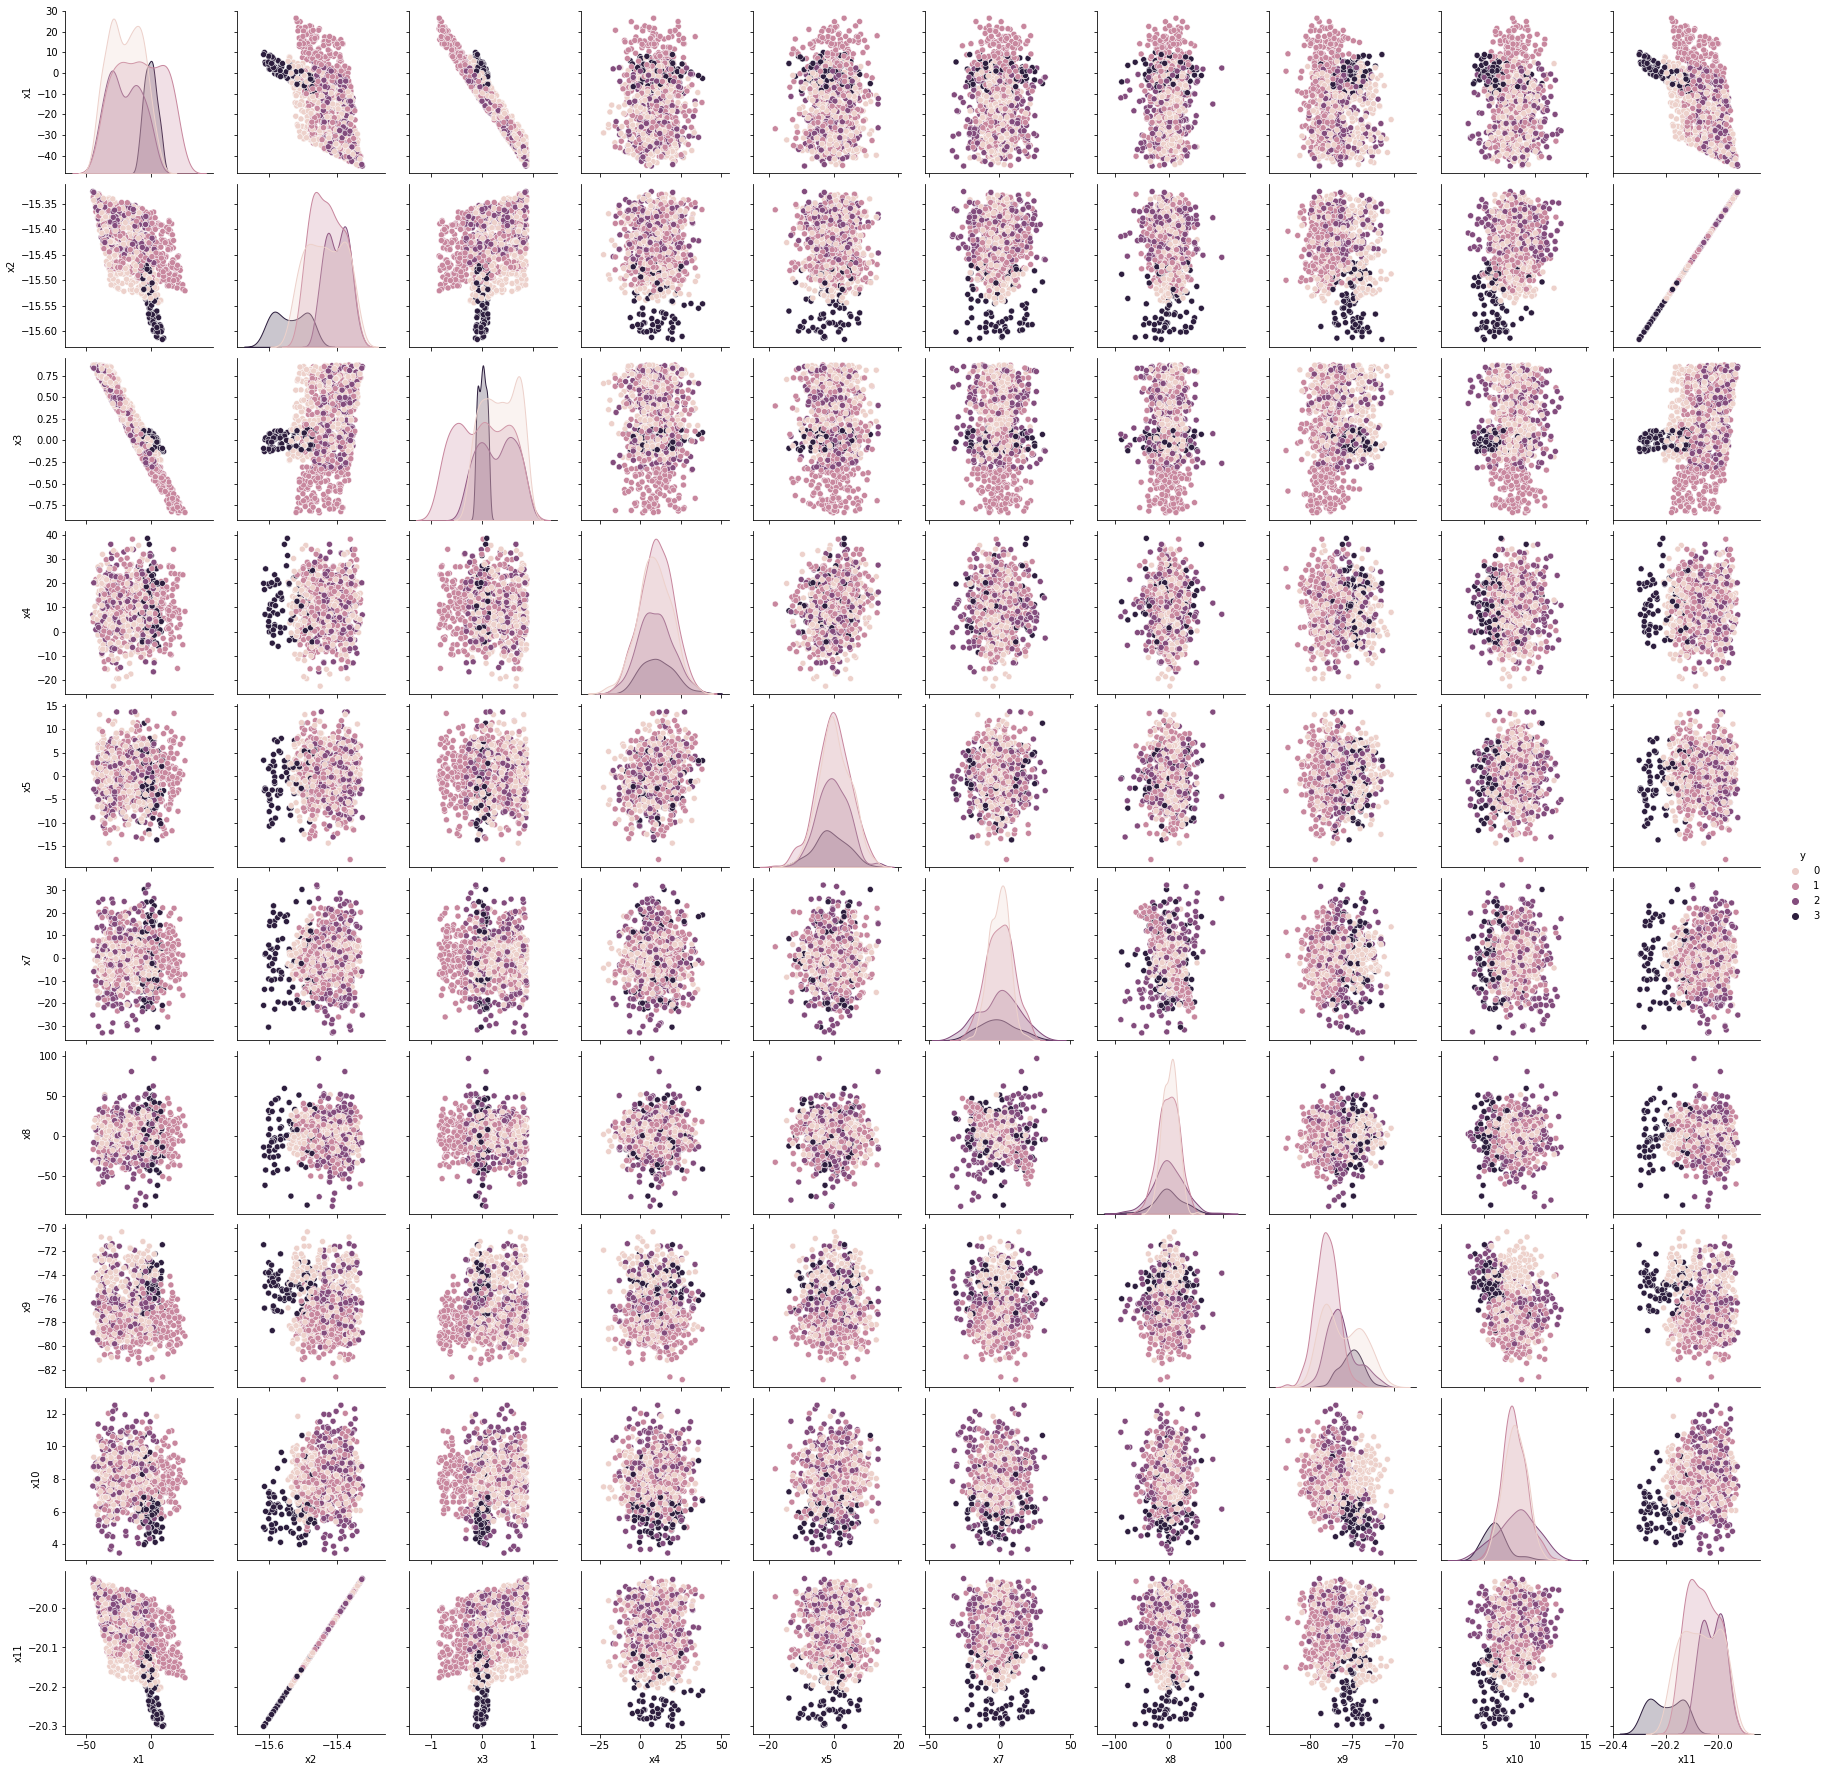

In [27]:
df_pair = df 
df_pair = df_pair.drop('x12' ,axis=1)
df_pair = df_pair.drop('x6' ,axis=1)

sns.pairplot(df_pair,hue="y")
plt.show()

## 3.2 Evaluating feature importance 

Feature ranking:
1. feature 7 (0.142123)
2. feature 2 (0.122458)
3. feature 1 (0.114142)
4. feature 9 (0.108662)
5. feature 0 (0.107069)
6. feature 8 (0.106197)
7. feature 5 (0.089668)
8. feature 6 (0.087422)
9. feature 4 (0.061078)
10. feature 3 (0.059956)
11. feature 10 (0.001225)


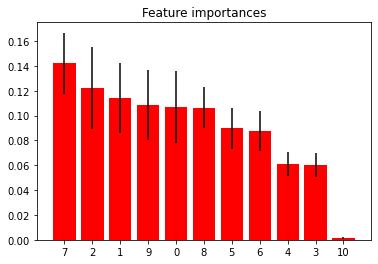

In [28]:

X_features = df.drop(['y'], axis=1)
X_features = X_features.drop(['x6'], axis=1)
y_features = df['y']

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_features, y_features)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_features.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_features.shape[1]), indices)
plt.xlim([-1, X_features.shape[1]])
plt.show()

## 3.3 Some more information about the training set

In [29]:
df['x12'].value_counts()

True     993
False      2
Name: x12, dtype: int64

**Very few values of False, deciding to drop x12**

We have categories: [3 0 1 2]


/Users/natalijastanojlovic/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


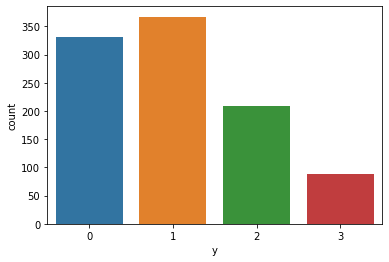

In [30]:
print('We have categories:', df['y'].unique())
sns.countplot(df['y'], label="Count")
plt.show()

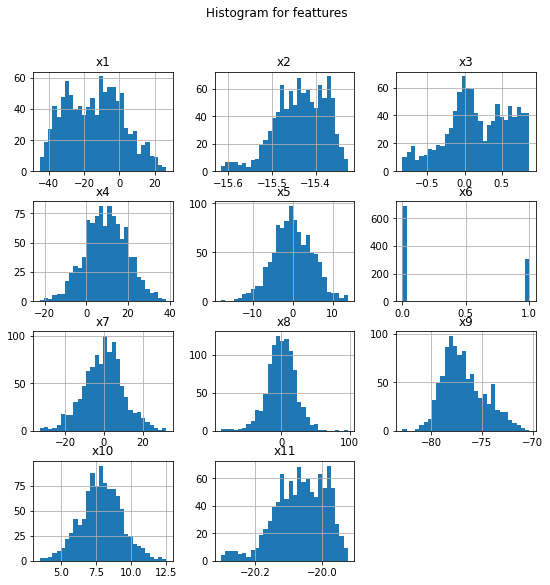

In [31]:
df_plot = df.drop('x12' ,axis=1) 
df_plot = df_plot.drop('y' ,axis=1)
df_plot.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for feattures")
#plt.savefig('')
plt.show()

**Noted a correlation between x2 and x11 and also, correlation between x5,x7,x10**

# 4. Cross-Validation & Model Selection

Setting up a cross validation

In [32]:
dict_classifiers = {
    "knn": KNeighborsClassifier(n_neighbors=17),
    "dt": DecisionTreeClassifier(criterion="entropy"),
    "rf": RandomForestClassifier(random_state=0,n_estimators=800),
    "gnb": GaussianNB(),
    "svm": SVC()
}

## 4.1 Accuracy for the different methods
Checking the accuray of diffrent classifers 

In [33]:
y = df['y']
X = df.drop(['y'], axis=1)
X = X.drop(['x6'], axis=1)

average_score ={}
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)

for key,value in dict_classifiers.items():
    y_score = cross_val_score(value,X,y,cv=cv, scoring = 'accuracy').mean()
    k = ("%s " % (key))
    average_score [k] = y_score   

In [34]:
all_values = average_score
max_value = max(all_values)
print(all_values)

{'knn ': 0.5772575250836122, 'dt ': 0.651505016722408, 'rf ': 0.7010033444816054, 'gnb ': 0.5638795986622073, 'svm ': 0.5444816053511705}


In [35]:
max_value = max(average_score.values())  # maximum value
max_keys = [k for k, v in average_score.items() if v == max_value] # getting all keys containing the `maximum`

print((max_keys,max_value))

(['rf '], 0.7010033444816054)


**Best classifier**: Random forest, acc. of 70,0%

## 4.2 Accuray of diffrent methods while dropping diffrent columns

In [36]:
y = df['y']
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=10)
arr = ['x1','x2','x3','x4','x5','x7','x8','x9','x10','x11','x12']
average_score = {}
for item in arr:
    X = df.drop(['y'], axis=1)
    X = X.drop(['x6'], axis=1)
    X = X.drop([item], axis=1)
    for key,value in dict_classifiers.items():
        y_score = cross_val_score(value,X,y,cv=cv, scoring = 'accuracy').mean()
        k = ("drop %s, clf: %s" % (item, key))
        average_score [k] = y_score   

In [37]:
all_values = average_score
max_value = max(all_values)

In [38]:
max_value = max(average_score.values())  # maximum value
max_keys = [k for k, v in average_score.items() if v == max_value] # getting all keys containing the `maximum`

print(max_value, max_keys)

0.708361204013378 ['drop x5, clf: rf']


**Best classifier**: Random forest, without column: x1,x5 or x6

## 4.3 Further iteration to find which columns to keep and not, using random forst classifier 

In [39]:
rf = RandomForestClassifier(random_state=0,n_estimators=800)

In [40]:
y = df['y']
#arr =['x1','x2','x4','x6']  # 1st
#arr = ['x11','x5','x4',,'x12',]   # 2nd
#arr =['x11','x5','x4','x3',]     # 3rd
arr =['x1','x2','x4','x6','x12']  # 4th
#arr = ['x2', 'x4','x5','x6','x12']

X = df.drop(['y'], axis=1)
for item in arr:
    X = X.drop([item], axis=1)

y_score = cross_val_score(rf,X,y,cv=10, scoring = 'accuracy').mean()
print ('Accuracy of Random Forest is %s without columns %s ' % (y_score, arr) )

Accuracy of Random Forest is 0.7176363636363636 without columns ['x1', 'x2', 'x4', 'x6', 'x12'] 


In [41]:
y = df['y']
#arr =['x1','x2','x4','x6']  # 1st
#arr = ['x11','x5','x4',,'x12',]   # 2nd
#arr =['x11','x5','x4','x3',]     # 3rd
#arr =['x1','x2','x4','x6','x12']  # 4th
arr = ['x2', 'x4','x5','x6','x12']

X = df.drop(['y'], axis=1)
for item in arr:
    X = X.drop([item], axis=1)

y_score = cross_val_score(rf,X,y,cv=10, scoring = 'accuracy').mean()
print ('Accuracy of Random Forest is %s without columns %s ' % (y_score, arr) )

Accuracy of Random Forest is 0.7225757575757575 without columns ['x2', 'x4', 'x5', 'x6', 'x12'] 


## 4.4 Results from dropping columns 

* Droppoing: **x1,x2** using rf **0.7140939597315437**
* Droppoing: **x1,x2,x6** using rf **0.7201342281879194**
* Droppoing: **x1,x2,x4,x6** using rf **0.7228187919463087**

* Dropping: **x4, x2** and using **rf** returns **0.7175879396984925**
* Dropping: **[x4', 'x5', 'x6', 'x12']** and using **rf** returns **0.7226130653266332**
* Dropping: **['x11', 'x5', 'x4', 'x3']** and using **rf** returns **0.7115577889447235**
* Dropping **arr = ['x2', 'x4','x5','x6','x12']** and using **rf** returns 


* Accuracy of Random Forest is 0.7246464646464646 without columns ['x1', 'x2', 'x4', 'x6']  (with outliers)
* Accuracy of Random Forest is 0.7135555555555556 without columns ['x1', 'x2', 'x4', 'x6'] Without outliers


# 5 Classification of evaluation set

**Dropping columns**

In [42]:
#col = ['x1','x2','x4','x6','x12']
#col = ['x1','x2','x4']
# col = ['x4', 'x5', 'x6', 'x12']
col = ['x2', 'x4','x5','x6','x12']

In [43]:
y = df['y']

In [44]:
X = df.drop(['y'], axis=1)
for item in col: 
    X =  X.drop([item], axis=1)

In [45]:
X.describe()

,x1,x3,x7,x8,x9,x10,x11
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,-14.009501,0.178112,-0.187444,-0.279128,-76.776298,7.868999,-20.065866
std,15.988681,0.422591,10.404313,20.977812,2.092015,1.475244,0.075805
min,-45.023090,-0.838280,-33.185590,-88.579430,-82.833770,3.469400,-20.300880
25%,-27.866930,-0.086820,-6.771385,-13.003625,-78.278975,6.931970,-20.117955
50%,-13.786220,0.141500,0.012780,0.571090,-77.112120,7.864820,-20.060060
75%,-2.133780,0.550415,6.222140,12.906535,-75.396750,8.812955,-20.004855
max,26.591120,0.872200,32.285820,97.420100,-70.344290,12.521470,-19.924560


## 5.1 Fitting evaluation set

In [46]:
evaluate.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x7,x8,x9,x10,x11
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5999.50000,-13.705000,-15.435546,0.169654,9.874238,-0.053392,0.024824,-0.127504,-76.645160,7.862251,-20.066210
std,2886.89568,15.518514,0.060076,0.405274,9.963562,4.985887,10.614200,21.314228,2.119727,1.415445,0.078099
min,1000.00000,-45.947920,-15.617860,-0.850150,-27.530720,-18.928720,-47.693870,-106.165830,-83.560080,2.277550,-20.303220
25%,3499.75000,-26.527927,-15.476855,-0.090720,3.040967,-3.418868,-6.517862,-13.044675,-78.186617,6.938462,-20.119910
50%,5999.50000,-13.431125,-15.429870,0.139390,9.794430,-0.091445,0.027100,-0.047975,-77.025725,7.893170,-20.058830
75%,8499.25000,-2.031515,-15.386695,0.500193,16.665895,3.302840,6.510300,12.986220,-75.177890,8.794800,-20.002710
max,10999.00000,27.411670,-15.325080,0.879730,46.520270,21.034260,49.900830,96.121260,-69.239610,13.637070,-19.922610


In [47]:
X_evaluate = evaluate.drop(['Unnamed: 0'], axis=1)
l={'Bayesian Inference': 0, 'GMMs and Accordions': 1,'Bayesian Interference':0}
X_evaluate['x6']=X_evaluate['x6'].replace(l)

for item in col: 
    X_evaluate =  X_evaluate.drop([item], axis=1)


In [48]:
X_evaluate.head()

,x1,x3,x7,x8,x9,x10,x11
0,-4.89325,0.09424,9.99021,29.30779,-73.62527,6.37794,-20.17271
1,-2.65501,-0.00970,-26.03203,-8.52706,-75.16638,6.12772,-20.15142
2,-15.82812,0.34021,5.96247,12.92132,-76.50426,7.08804,-20.12744
3,-16.10880,0.36757,15.17109,1.76525,-78.96563,7.81869,-20.13828
4,-37.41717,0.82413,-7.96083,12.72000,-78.48946,6.84485,-20.03709


## 5.2 Classification of evaluation set

In [49]:
rf = RandomForestClassifier(random_state=0,n_estimators=800)

dt = DecisionTreeClassifier(criterion="entropy")
knn = KNeighborsClassifier(n_neighbors=17)
gnb = GaussianNB()
svm = SVC()
rf = RandomForestClassifier(random_state=0,n_estimators=800)
gpc = GaussianProcessClassifier()

In [50]:
rf.fit(X,y)
y_pred = rf.predict(X_evaluate)

In [51]:
y_pred

array([3, 3, 0, ..., 0, 0, 0])

In [52]:
print('0: %s ' % np.count_nonzero(y_pred == 0))
print('1: %s ' % np.count_nonzero(y_pred == 1))
print('2: %s ' % np.count_nonzero(y_pred == 2))
print('3: %s ' % np.count_nonzero(y_pred == 3))

0: 3721 
1: 3506 
2: 1840 
3: 933 


### 5.2.1 Distribution of evaluation set

/Users/natalijastanojlovic/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


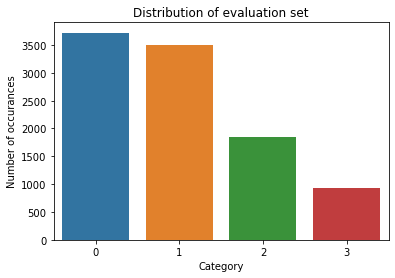

In [53]:
sns.countplot(y_pred, label="Count")
plt.ylabel('Number of occurances')
plt.xlabel('Category')
plt.title('Distribution of evaluation set')

plt.show()

### 5.2.1 Distribution of traning set

/Users/natalijastanojlovic/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


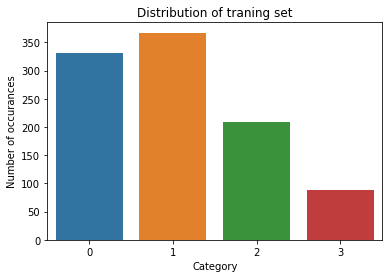

In [54]:
sns.countplot(y, label="Count")
plt.ylabel('Number of occurances')
plt.xlabel('Category')
plt.title('Distribution of traning set')

plt.show()

In [55]:
labels = {'Atsuto': 0, 'Bob': 1,'Jorg':2,'Shoogee':3}
final_pred = y_pred
for key,value in labels.items():
    final_pred = np.where(y_pred==value, key, final_pred) 
final_pred

array(['Shoogee', 'Shoogee', 'Atsuto', ..., 'Atsuto', 'Atsuto', 'Atsuto'],
      dtype='<U21')

In [57]:
np.savetxt("Labels_NatalijaStanojlovic.txt", final_pred, fmt="%s")
